In [12]:
# !pip install plotly
# !pip install nbformat

import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
# Obtener el directorio en el que se encuentra el archivo .ipynb
current_directory = os.getcwd()
print("El directorio actual es:", current_directory)

El directorio actual es: h:\OneDrive\Escritorio\Proyectos\Data Viz\sales_viz


In [16]:
raw_data = pd.read_csv("shopping_trends.csv")
raw_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# EDA

In [17]:
## Obtencion de los datos fundamentales del dataset
print(f'{"-"*10}Tamaño del dataset{"-"*10}')
print(f'Filas = {raw_data.shape[0]}')
print(f'Columnas = {raw_data.shape[1]}')

----------Tamaño del dataset----------
Filas = 3900
Columnas = 19


In [18]:
print(f'{"-"*10}Descripcion{"-"*10}')
print(raw_data.info())


----------Descripcion----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 

In [19]:
print(f'{"-"*10}Valores nulos{"-"*10}')
print(raw_data.isnull().sum())

----------Valores nulos----------
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [20]:
## Items 
## Mas vendidos 
most_sold_items = raw_data["Item Purchased"].value_counts().reset_index()
#Items
## Mas vendidos (x Categoria)
most_sold_items_cat = raw_data["Category"].value_counts().reset_index()
#Items
## Mas vendidos (x Genero)
gender_distribution = raw_data.pivot_table(index="Category", columns="Gender", fill_value=None, aggfunc="size").reset_index()

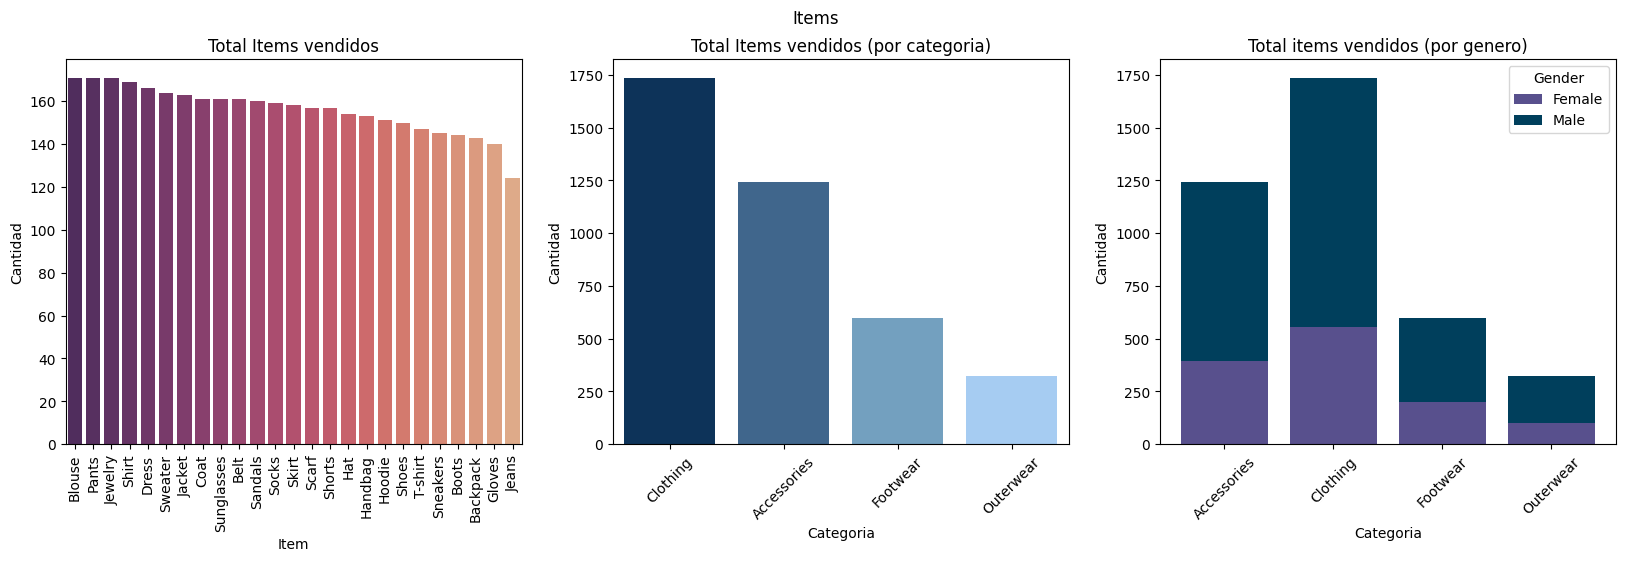

In [21]:
#Graficos
fig, ax = plt.subplots(1,3,figsize=(20,5))
colors = ['#003366', '#336699', '#66A3CC', '#99CCFF']

#Prier grafico
sns.barplot(data=most_sold_items, x="Item Purchased", hue="Item Purchased", y="count",ax=ax[0], legend=False, palette="flare_r")
ax[0].set_xlabel("Item")
ax[0].set_ylabel("Cantidad")
ax[0].tick_params(axis="x", rotation=90)
ax[0].set_title("Total Items vendidos")

#Segundo grafico
sns.barplot(most_sold_items_cat, x="Category", y="count", ax=ax[1], hue="Category", legend=False, palette=colors)
ax[1].set_xlabel("Categoria")
ax[1].set_ylabel("Cantidad")
ax[1].tick_params(axis="x", rotation=45)
ax[1].set_title("Total Items vendidos (por categoria)")

#Tercer grafico
plt.bar(gender_distribution["Category"], gender_distribution["Female"], label="Female", color="#58508d")
plt.bar(gender_distribution["Category"], gender_distribution["Male"], bottom=gender_distribution["Female"], label="Male", color="#003f5c")
plt.legend(title="Gender", loc="upper right")
ax[2].set_title("Total items vendidos (por genero)")
ax[2].set_xlabel("Categoria")
ax[2].set_ylabel("Cantidad")
ax[2].tick_params(axis="x", rotation=45)


plt.suptitle("Items")
plt.tight_layout
plt.show()


In [24]:
# Items por review
fig_ratings = px.histogram(raw_data, x="Review Rating", nbins=10,color_discrete_sequence=['#FFA07A'])
fig_ratings.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_ratings.update_layout(
    title="Distribucion de las reviews",
    xaxis_title="Rating",
    yaxis_title="Cantidad",
    template="plotly_white",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig_ratings.show()

In [25]:
# Metodos de pago
payment_counts = raw_data['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count'] 

# Grafico 
fig = px.pie(
    payment_counts, 
    values='Count', 
    names='Payment Method',
    title="Distribucion de metodos de pago",
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Mostrar el gráfico
fig.show()

In [26]:
# Tipos de envio
shipping_counts = raw_data['Shipping Type'].value_counts().reset_index()
shipping_counts.columns = ['Shipping Type', 'Count'] 

# Grafico 
fig = px.pie(
    shipping_counts, 
    values='Count', 
    names='Shipping Type',
    title="Distribucion de tipos de envio",
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Mostrar el gráfico
fig.show()

Text(0.5, 1.0, 'Esta suscripto?')

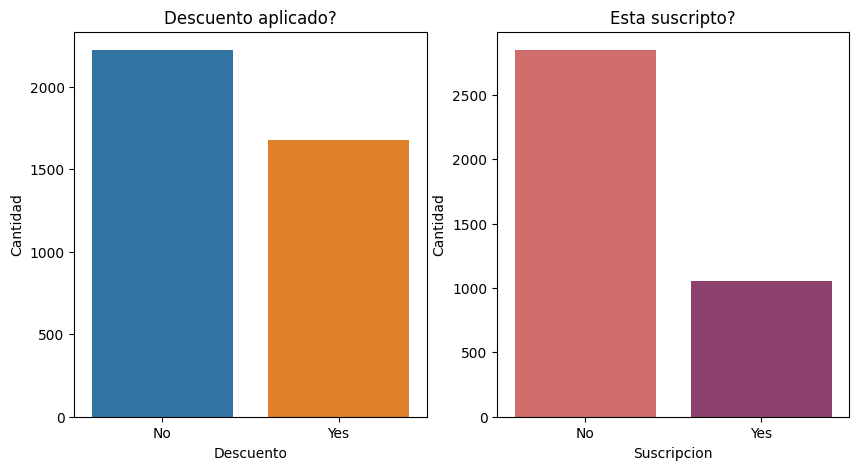

In [27]:
#Descuentos
discount_count = raw_data["Discount Applied"].value_counts().reset_index()
discount_count.columns = ["Discount Applied", "Count"]

#Suscripcion
Suscripcion_count = raw_data["Subscription Status"].value_counts().reset_index()
Suscripcion_count.columns = ["Suscripcion", "Count"]

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(discount_count, x="Discount Applied", y="Count", ax=ax[0], hue="Discount Applied")
sns.barplot(Suscripcion_count, x="Suscripcion", y="Count", ax=ax[1], hue="Suscripcion", palette="flare")
ax[0].set_xlabel("Descuento")
ax[1].set_xlabel("Suscripcion")
ax[0].set_ylabel("Cantidad")
ax[1].set_ylabel("Cantidad")
ax[0].set_title("Descuento aplicado?")
ax[1].set_title("Esta suscripto?")

In [28]:
#Categoria por revenue

revenue_category = raw_data.groupby("Category")["Purchase Amount (USD)"].sum().reset_index()
fig = px.treemap(
    revenue_category,
    path=["Category"],
    values="Purchase Amount (USD)",
    color="Purchase Amount (USD)",
    title="Revenue por categoria",
    color_continuous_scale=px.colors.sequential.Sunset
)
fig.update_layout(
    width=1000,
    height=700,
    title_font_size=20,
    title_x=0.5
)
fig.show()

In [29]:
#Revenue por tipo de envio 

revenue_shipping = raw_data.groupby("Shipping Type")["Purchase Amount (USD)"].sum().reset_index()
revenue_shipping = revenue_shipping.sort_values(by="Purchase Amount (USD)", ascending=False)
revenue_shipping_fig = px.bar(revenue_shipping,
                              x="Shipping Type", y="Purchase Amount (USD)",
                              color="Shipping Type", title="Revenue por tipo de envio")
revenue_shipping_fig.update_traces(marker_line_color='black', marker_line_width=1.5)
revenue_shipping_fig.update_layout(
    width=1000,
    height=500,
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Tipo de envio",
    yaxis_title="Revenue total"
)
revenue_shipping_fig.show()
